In [1]:
import os
import shutil
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

## Splitting data

In [2]:
sourcePath = '..\\tw'

sourcePathMina = os.path.join(sourcePath, 'mina')
sourcePathNayeon = os.path.join(sourcePath, 'nayeon')

print(f"There are {len(os.listdir(sourcePathMina))} images of Mina.")
print(f"There are {len(os.listdir(sourcePathNayeon))} images of Nayeon.")

There are 1018 images of Mina.
There are 1120 images of Nayeon.


In [3]:
rootDir = '..\\trainImg'

if os.path.exists(rootDir):
    shutil.rmtree(rootDir)

def create_train_test_dirs(rootPath):
    minaTrain = os.path.join(rootPath, 'training/mina')
    minaTest = os.path.join(rootPath, 'testing/mina')
    nayeonTrain = os.path.join(rootPath, 'training/nayeon')
    nayeonTest = os.path.join(rootPath, 'testing/nayeon')
    os.makedirs(minaTrain)
    os.makedirs(minaTest)
    os.makedirs(nayeonTrain)
    os.makedirs(nayeonTest)

try:
  create_train_test_dirs(rootPath=rootDir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [4]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  files = random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE)))
  counter = 0
  for i in files:
    if os.path.getsize(os.path.join(SOURCE, i)) == 0:
      print(f'{i} is zero length, so ignoring.')
    else:
      if(counter < int((len(files))*SPLIT_SIZE)):
        copyfile(os.path.join(SOURCE, i), os.path.join(TRAINING, i))
        counter += 1
      else:
        copyfile(os.path.join(SOURCE, i), os.path.join(TESTING, i))

In [5]:
mina_source_dir = "..\\tw\\mina"
nayeon_source_dir = "..\\tw\\nayeon"

TRAINING_DIR = "..\\trainImg\\training\\"
TESTING_DIR = "..\\trainImg\\testing\\"

training_mina_dir = os.path.join(TRAINING_DIR, "mina\\")
testing_mina_dir = os.path.join(TESTING_DIR, "mina\\")

training_nayeon_dir = os.path.join(TRAINING_DIR, "nayeon\\")
testing_nayeon_dir = os.path.join(TESTING_DIR, "nayeon\\")

# Empty directories in case you run this cell multiple times
if len(os.listdir(training_mina_dir)) > 0:
  for file in os.scandir(training_mina_dir):
    os.remove(file.path)
if len(os.listdir(training_nayeon_dir)) > 0:
  for file in os.scandir(training_nayeon_dir):
    os.remove(file.path)
if len(os.listdir(testing_mina_dir)) > 0:
  for file in os.scandir(testing_mina_dir):
    os.remove(file.path)
if len(os.listdir(testing_nayeon_dir)) > 0:
  for file in os.scandir(testing_nayeon_dir):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(mina_source_dir, training_mina_dir, testing_mina_dir, split_size)
split_data(nayeon_source_dir, training_nayeon_dir, testing_nayeon_dir, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(training_mina_dir))} images of Mina for training")
print(f"There are {len(os.listdir(training_nayeon_dir))} images of Nayeon for training")
print(f"There are {len(os.listdir(testing_mina_dir))} images of Mina for testing")
print(f"There are {len(os.listdir(testing_nayeon_dir))} images of Nayeon for testing")



There are 916 images of Mina for training
There are 1008 images of Nayeon for training
There are 102 images of Mina for testing
There are 112 images of Nayeon for testing


In [25]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  batchsize = 32
  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=batchsize,
                                                      class_mode='binary',
                                                      target_size=(300, 300))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1./255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=batchsize,
                                                                class_mode='binary',
                                                                target_size=(300, 300))
  ### END CODE HERE
  return train_generator, validation_generator


In [26]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 1924 images belonging to 2 classes.
Found 214 images belonging to 2 classes.


In [31]:
# GRADED FUNCTION: create_model
def create_model():

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid'),
  ])

  
  model.compile(optimizer=RMSprop(lr=0.0001),
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model


In [33]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/50
61/61 [==============================] - 151s 2s/step - loss: 0.7338 - accuracy: 0.5754 - val_loss: 0.6525 - val_accuracy: 0.6028
Epoch 2/50
61/61 [==============================] - 139s 2s/step - loss: 0.6465 - accuracy: 0.6351 - val_loss: 0.7186 - val_accuracy: 0.5514
Epoch 3/50
61/61 [==============================] - 137s 2s/step - loss: 0.6331 - accuracy: 0.6424 - val_loss: 0.6003 - val_accuracy: 0.6822
Epoch 4/50
61/61 [==============================] - 138s 2s/step - loss: 0.6232 - accuracy: 0.6710 - val_loss: 0.5885 - val_accuracy: 0.7056
Epoch 5/50
61/61 [==============================] - 136s 2s/step - loss: 0.6102 - accuracy: 0.6720 - val_loss: 0.5675 - val_accuracy: 0.6729
Epoch 6/50
61/61 [==============================] - 136s 2s/step - loss: 0.6091 - accuracy: 0.6830 - val_loss: 0.5694 - val_accuracy: 0.7150
Epoch 7/50
61/61 [==============================] - 129s 2s/step - loss: 0.5973 - accuracy: 0.6871 - val_loss: 0.5585 - val_accuracy: 0.7009
Epoch 8/50
61

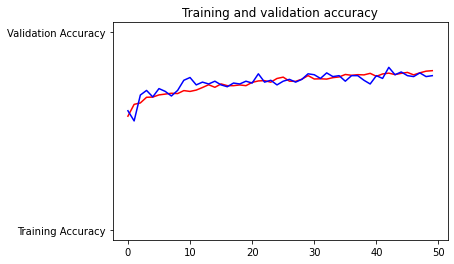

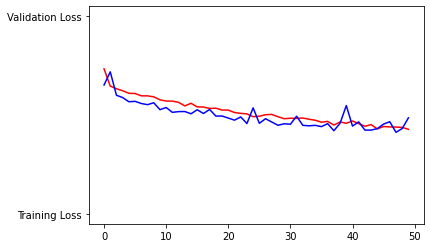

In [34]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()